In [25]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing,svm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold , cross_val_score,KFold
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier


In [4]:
directory = r"C:\Users\HP\Downloads\programmingA\Dataset\Cropped"

In [6]:
from skimage import filters
from skimage import data, exposure, img_as_float
from skimage.color import rgb2gray
from skimage.io import imread
import numpy as np

def angle(dx, dy):
 """Calculate the angles between horizontal and vertical operators."""
 return np.mod(np.arctan2(dy, dx), np.pi)
hist=[]
label=[]
for index,name in enumerate(os.listdir(directory)):
    for image in os.listdir(os.path.join(directory,name)):
        img = imread(os.path.join(directory,name,image.strip()))
        gray_img = rgb2gray(img)
        angle_sobel = angle(filters.sobel_h(gray_img),filters.sobel_v(gray_img))
        Hist,_=exposure.histogram(angle_sobel, nbins=36)
        hist.append(Hist)
        label.append(index)

In [7]:
X = np.array(hist)
Y = np.array(label)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, stratify=Y,random_state=42)

In [9]:
scaler = preprocessing.StandardScaler().fit(X_train)

In [10]:
X_scaled = scaler.transform(X_train)

In [11]:
X_scaled.mean(axis=0)

array([ 2.15329546e-17,  2.39145621e-16, -3.83832751e-16,  5.29415221e-16,
       -1.76382206e-16, -3.40766841e-16, -3.99501221e-16,  1.08515347e-16,
       -4.49998461e-16,  1.55610292e-16,  2.09733664e-16, -7.82528164e-17,
       -2.15777217e-17, -6.60627467e-16, -1.40389492e-16,  3.66642200e-16,
       -2.42279315e-16,  8.61318185e-17,  1.48626631e-17, -6.30320169e-17,
        1.14603667e-16, -4.66651807e-16, -5.90925158e-16, -6.29693430e-16,
        2.43085122e-16,  1.55073087e-16, -2.31445687e-17,  3.33066907e-17,
        1.08515347e-16, -2.05928464e-16,  5.12314205e-16,  4.80440060e-16,
       -3.40945909e-16, -3.62702699e-16, -2.90806805e-16,  2.69850226e-16])

In [12]:
X_scaled.std(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1.])

In [13]:
X_test_scaled = scaler.transform(X_test)


In [16]:
train_errors=[]
val_errors=[]
kf = KFold(n_splits=5, shuffle=True, random_state=42)
k_val=[1,3,5,7,10,20]
for k in k_val:
    knn = KNeighborsClassifier(n_neighbors=k)    
    train = []
    val= []
    for train_idx, val_idx in kf.split(X_scaled):
        x_train, x_val = X_scaled[train_idx], X_scaled[val_idx]
        Y_train, Y_val = y_train[train_idx], y_train[val_idx]
        knn.fit(x_train, Y_train)
        train_pred = knn.predict(x_train)
        val_pred = knn.predict(x_val)
        train_accuracy = accuracy_score(Y_train, train_pred)
        val_accuracy = accuracy_score(Y_val, val_pred)
        train.append(1 - train_accuracy)  
        val.append(1 - val_accuracy) 
    train_errors.append(np.mean(train))
    val_errors.append(np.mean(val))

In [17]:
stratified_train_e=[]
stratified_val_e=[]
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for k in k_val:
    knn = KNeighborsClassifier(n_neighbors=k)    
    train = []
    val= []
    for train_idx, val_idx in skf.split(X_scaled,y_train):
        x_train, x_val = X_scaled[train_idx], X_scaled[val_idx]
        Y_train, Y_val = y_train[train_idx], y_train[val_idx]
        knn.fit(x_train, Y_train)
        train_pred = knn.predict(x_train)
        val_pred = knn.predict(x_val)
        train_accuracy = accuracy_score(Y_train, train_pred)
        val_accuracy = accuracy_score(Y_val, val_pred)
        train.append(1 - train_accuracy)  
        val.append(1 - val_accuracy) 
    stratified_train_e.append(np.mean(train))
    stratified_val_e.append(np.mean(val))

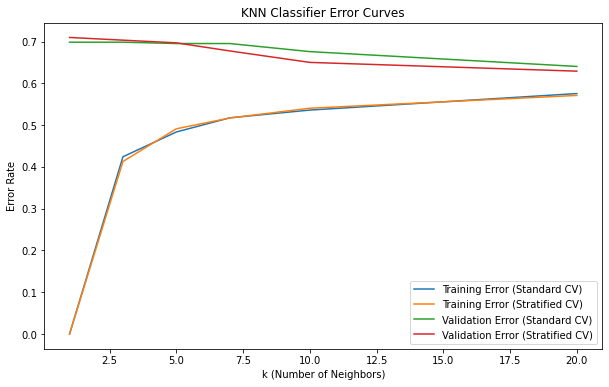

In [18]:
plt.figure(figsize=(10, 6))
plt.plot(k_val, train_errors, label='Training Error (Standard CV)')
plt.plot(k_val, stratified_train_e, label='Training Error (Stratified CV)')
plt.plot(k_val, val_errors, label='Validation Error (Standard CV)')
plt.plot(k_val, stratified_val_e, label='Validation Error (Stratified CV)')

plt.title('KNN Classifier Error Curves')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Error Rate')
plt.legend()

plt.show()

In [19]:
Which 𝑘 has the lowest mean error for each curve? 
Standard Training error      k=1
stratified Training error    k=1
standard validation error    k=7
Stratified validation error  k=3

SyntaxError: invalid syntax (4257586695.py, line 1)

In [ ]:
Comment about (1) the  model complexity for k-Nearest Neighbor classifier in relation to 𝑘 :
Less - k=1
intermediate - for k= 3,5,7,10
high - k= 20

In [ ]:
when/whether there is overfitting/underfitting. :
overfits at k=1 having less training error and more validation error 
underfits at k=20 with more number of neighbours

In [20]:
# k=3
Model = KNeighborsClassifier(n_neighbors = 3)
Model.fit(X_scaled, y_train)
p = Model.predict(X_test_scaled)
print("Test error when k=3 :" + str(1-(accuracy_score(y_test,p))))

Test error when k=3 :0.6451612903225806


MLPClassifier(hidden_layer_sizes=(10, 10, 10))


              precision    recall  f1-score   support

           0       0.38      0.47      0.42        49
           1       0.27      0.26      0.27        34
           2       0.31      0.38      0.34        37
           3       0.31      0.14      0.20        35

    accuracy                           0.33       155
   macro avg       0.32      0.31      0.31       155
weighted avg       0.32      0.33      0.32       155

Mean validation acc: 0.29806451612903223


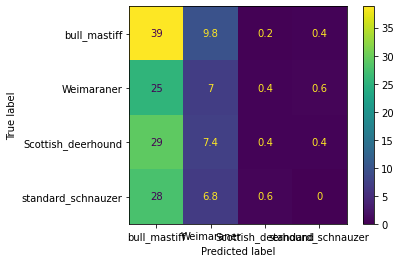

LinearSVC()


              precision    recall  f1-score   support

           0       0.32      0.43      0.37        49
           1       0.33      0.15      0.20        34
           2       0.39      0.54      0.45        37
           3       0.21      0.14      0.17        35

    accuracy                           0.33       155
   macro avg       0.31      0.31      0.30       155
weighted avg       0.32      0.33      0.31       155

Mean validation acc: 0.2812903225806451


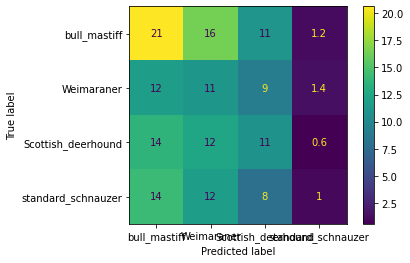

RandomForestClassifier()


              precision    recall  f1-score   support

           0       0.44      0.65      0.52        49
           1       0.41      0.26      0.32        34
           2       0.42      0.41      0.41        37
           3       0.33      0.23      0.27        35

    accuracy                           0.41       155
   macro avg       0.40      0.39      0.38       155
weighted avg       0.40      0.41      0.40       155

Mean validation acc: 0.40774193548387105


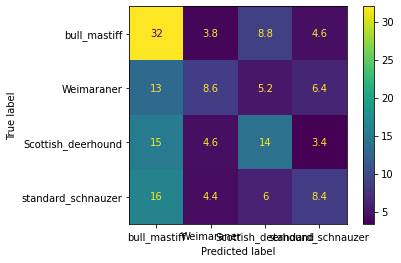

In [26]:
from sklearn import metrics
nn_model=MLPClassifier(hidden_layer_sizes=(10,10,10))
linear_svc_classifier = LinearSVC()
rf_classifier = RandomForestClassifier()
for clf in [nn_model,linear_svc_classifier,rf_classifier]:
    print(str(clf)+"\n\n")
    clf.fit(X_scaled,y_train)
    predictions=clf.predict(X_test_scaled)
    confusion_matrix = metrics.confusion_matrix(y_test, predictions)
    report=metrics.classification_report(y_test,predictions)
    print(report)
    truelabels,predictlabels,cm,val_a=[],[],[],[]
    for traini,testi in skf.split(X,Y):
        xtrain,xtest=X[traini],X[testi]
        ytrain,ytest=Y[traini],Y[testi]
        
        clf.fit(xtrain,ytrain)
        p=clf.predict(xtest)
        
        truelabels.extend(ytest)
        predictlabels.extend(p)
        val_a.append(metrics.accuracy_score(ytest,p))        
        cm.append(metrics.confusion_matrix(ytest,p))
    print("Mean validation acc: "+str(np.mean(val_a)))
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = sum(cm)/len(cm), display_labels = ['bull_mastiff', 'Weimaraner', 'Scottish_deerhound','standard_schnauzer'] )
    cm_display.plot()
    plt.show()

In [ ]:
Byvisually comparing (e.g., looking at the color on the diagonal values, etc.) the three confusion
 matrices (on the test set), which do you think is the best method? Why? 
    Random Forest is  best method among the three methods

In [ ]:
Based on the mean validation accuracies (from the 5-fold cross-validation) for the three methods.
 Which is the best method?
    Random Forest: 0.407

In [ ]:
Compute the accuracies for the three methods on the test set. Which is the best method? 
Random Forest has best accuracy among the three methods.(0.41)

In [ ]:
Compute the F-measure for the three methods on the test set. Which is the best method?  
    Ans : Random Forest is the best with weighted avg of 0.40
